# Описание данных

Признаки:
 - RowNumber - индекс строки в данных
 - Customerld - уникальный идентификатор клиента
 - Surname - фамилия
 - CreditScore - кредитный рейтинг
 - Geography - страна проживания
 - Gender - пол
 - Age - возраст
 - Tenure - количество недвижимости у клиента
 - Balance - баланс на счете
 - NumOfProducts -  количество продуктов банка, используемых клиентом
 - HasCrCard - наличие кредитной карты
 - IsActiveMember - активность клиента
 - EstimatedSalary - предпологаемая зарплата

Целевой (искомый) признак: 
 - Exited - факт ухода клиента

# Подключение модулей

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных

In [78]:
# Загружаем данные из файла в формте CSV, указываем символ-разделителя и сохраняем данные в дата-фрейм (переменная df)
df = pd.read_csv('Churn_Modelling.csv', sep=',')

In [79]:
# Проверяем, что данные загрузились - выводим первые несколько строк таблицы
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Разведочный анализ данных (РАД)

На какие вопросы может дать ответ РАД?
 - сколько у нас данных? (кол-во объектов и их признаков)
 - какие типы данных имеют признаки?
 - какой признак является целевым (target)? С какой задачей мы имеем дело? (классификация или регрессия)
 - сколько значений пропущено в различных колонках?
 - какова статистика распределения значений признаков? Есть ли выбросы (аномальные наблюдения)?
 - как признаки соотносятся между собой (коррелируют, влияют друг на друга)? Как признаки влияют на целевой признак?
 - для задач классификаций: сколько у нас классов - два или больше? Сбалансированы ли классы?
 - и др.

В зависимости от формы представления результатов РАД можно разделить на:
 - числовой/табличный анализ
 - визуалиный (графический) анализ

В зависимости от кол-ва одноврененно исследуемых признаков РАД можно раздедить на:
 - одномерный анализ (univariate analysis) - исследование каждого признака в отдельности
 - двумерный анализ (bivariate analysis) - исследование взаимного влияния признаков и сравнение их характеристик
 - многомерный анализ (multivariate analysis) - сравнение статических характеристик нескольких признаков


In [80]:
# объем даннх (строк и столбцов - объктов и признаков)
df.shape

(10000, 14)

In [81]:
# выводим типы данных
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [82]:
# целевой признак - Exited

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [84]:
# Имена колонок в виде списка
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [85]:
# проверим сколько пропусков в колонках
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [86]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке RowNumber = 0
Кол-во пропусков в колонке CustomerId = 0
Кол-во пропусков в колонке Surname = 0
Кол-во пропусков в колонке CreditScore = 0
Кол-во пропусков в колонке Geography = 0
Кол-во пропусков в колонке Gender = 0
Кол-во пропусков в колонке Age = 0
Кол-во пропусков в колонке Tenure = 0
Кол-во пропусков в колонке Balance = 0
Кол-во пропусков в колонке NumOfProducts = 0
Кол-во пропусков в колонке HasCrCard = 0
Кол-во пропусков в колонке IsActiveMember = 0
Кол-во пропусков в колонке EstimatedSalary = 0
Кол-во пропусков в колонке Exited = 0


In [87]:
# сколько уникальных значений 
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [88]:
df['Geography'].nunique()

3

In [89]:
# Какие это значения
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [90]:
# какова статистика распределения этих значений? (Сколько каких значений)
df['Geography'].value_counts(normalize=True).round(2)

Geography
France     0.50
Germany    0.25
Spain      0.25
Name: proportion, dtype: float64

In [91]:
# исследование целевого (target) признака - факта ухода клиента
print('кол-во уникальных значений в таргете: ', df['Exited'].nunique())
print('перечень уникальных значений в таргете: ', df['Exited'].unique())
print('статистика распределения значений в таргете: \n', df['Exited'].value_counts(normalize=False))

кол-во уникальных значений в таргете:  2
перечень уникальных значений в таргете:  [1 0]
статистика распределения значений в таргете: 
 Exited
0    7963
1    2037
Name: count, dtype: int64


In [92]:
# описательная статистика для признака Age
df['Age'].describe().round(2)

count    10000.00
mean        38.92
std         10.49
min         18.00
25%         32.00
50%         37.00
75%         44.00
max         92.00
Name: Age, dtype: float64

In [93]:
# описательная статистика для всех (числовых) признаков
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.0,2887.0,1.0,2501.0,5000.0,7500.0,10000.0
CustomerId,10000.0,15690941.0,71936.0,15565701.0,15628528.0,15690738.0,15753234.0,15815690.0
CreditScore,10000.0,651.0,97.0,350.0,584.0,652.0,718.0,850.0
Age,10000.0,39.0,10.0,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,5.0,3.0,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,76486.0,62397.0,0.0,0.0,97199.0,127644.0,250898.0
NumOfProducts,10000.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,100090.0,57510.0,12.0,51002.0,100194.0,149388.0,199992.0


## Визуальный анализ

<Axes: xlabel='Exited'>

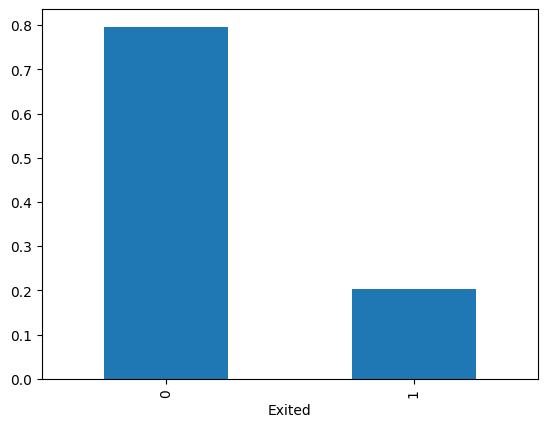

In [94]:
df['Exited'].value_counts(normalize=True).plot.bar()

<Axes: ylabel='proportion'>

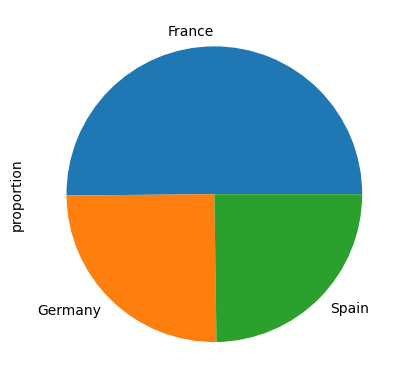

In [95]:
df['Geography'].value_counts(normalize=True).plot.pie()

<Axes: ylabel='Age'>

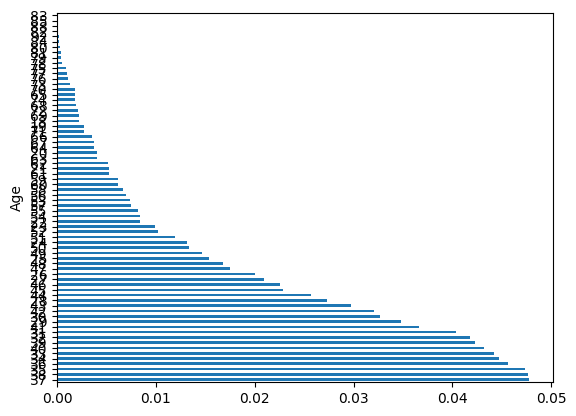

In [96]:
df['Age'].value_counts(normalize=True).plot.barh()

array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

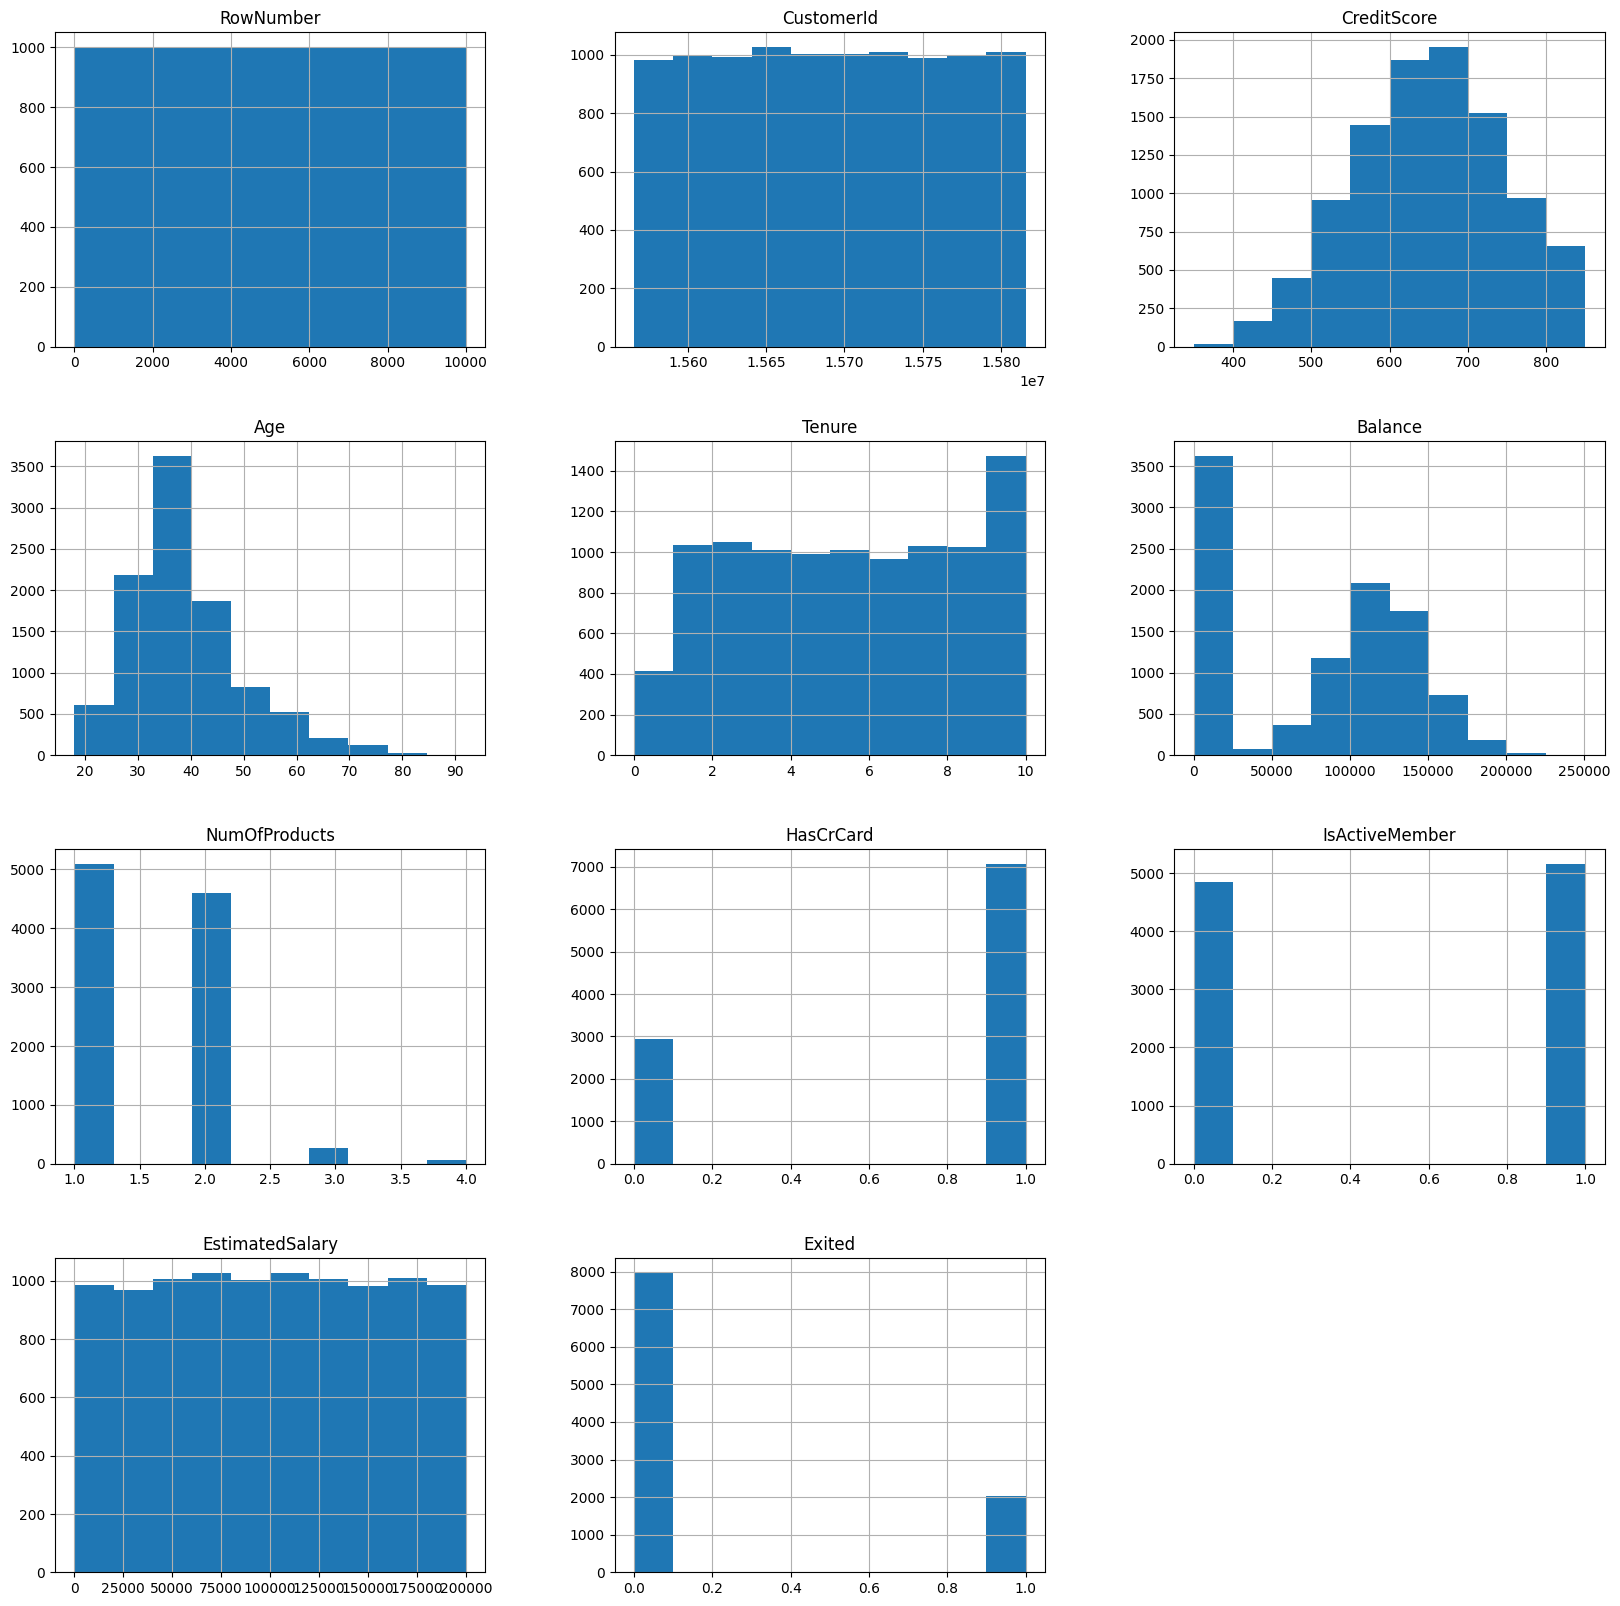

In [97]:
df.hist(figsize=(20,20))

<Axes: >

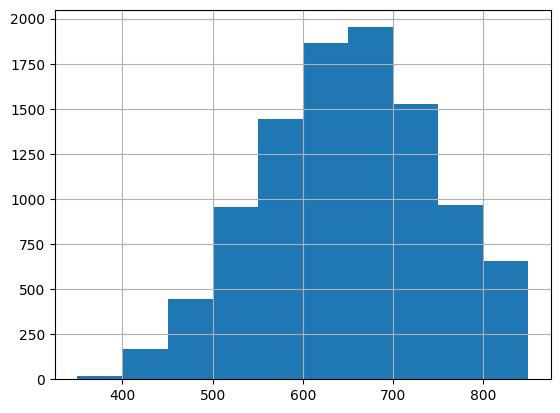

In [98]:
# гистрограмма для 1 признака
df['CreditScore'].hist()

<Axes: >

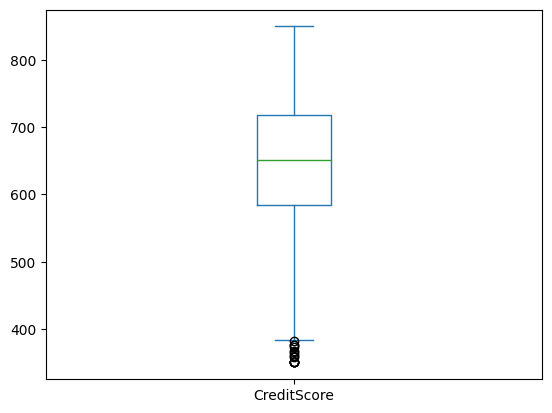

In [99]:
df['CreditScore'].plot.box()

<Axes: >

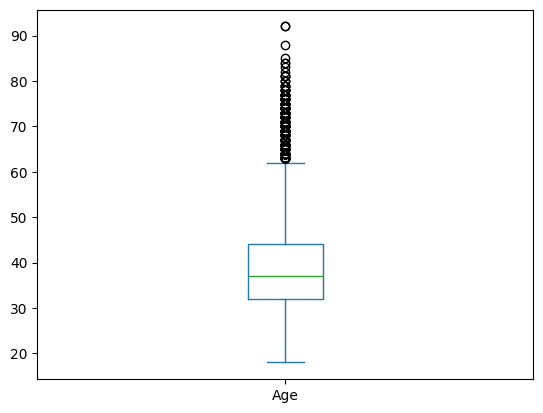

In [100]:
df['Age'].plot.box()

<Axes: ylabel='Density'>

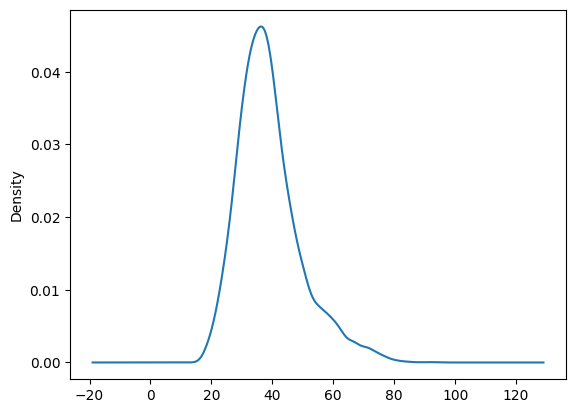

In [101]:
df['Age'].plot.density()

## Двумерный и многомерный анализ

In [102]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [103]:
# список признаков для анализа
features_eda = [ 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_num']
features_eda

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Geography_num']

In [104]:
df['Geography_num'] = df['Geography']

df['Geography_num'].replace('France', 0, inplace=True)
df['Geography_num'].replace('Spain', 1, inplace=True)
df['Geography_num'].replace('Germany', 2, inplace=True)

In [105]:
# изменим пол на числовой тип
df['Gender'].replace('Female', 1, inplace=True)
df['Gender'].replace('Male', 0, inplace=True)
df['Gender'] = df['Gender'].astype('int64')

In [106]:
corr = df[features_eda].corr()
corr

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
CreditScore,1.000000,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.008267
Gender,0.002857,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512,0.016936
Age,-0.003965,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.048092
Tenure,0.000842,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.001418
Balance,0.006268,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.348700
NumOfProducts,0.012238,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.006180
HasCrCard,-0.005458,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.004036
IsActiveMember,0.025651,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.012692
EstimatedSalary,-0.001384,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.007382
Exited,-0.027094,0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.153771


<Axes: >

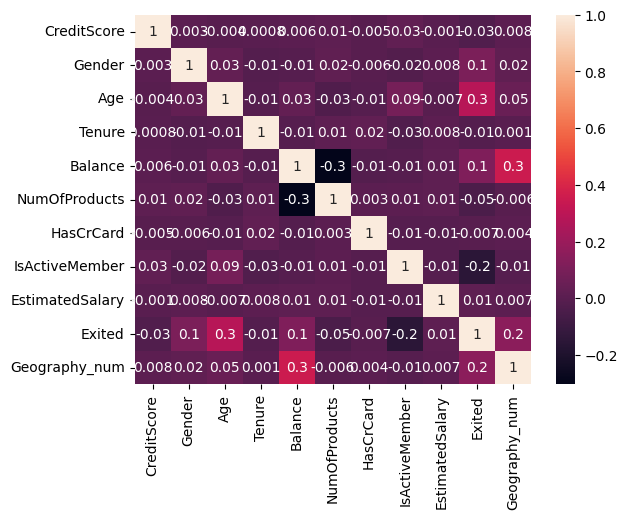

In [107]:
# тепловая карта корреляции между признаками
sns.heatmap(corr, annot=True ,fmt='.1g')

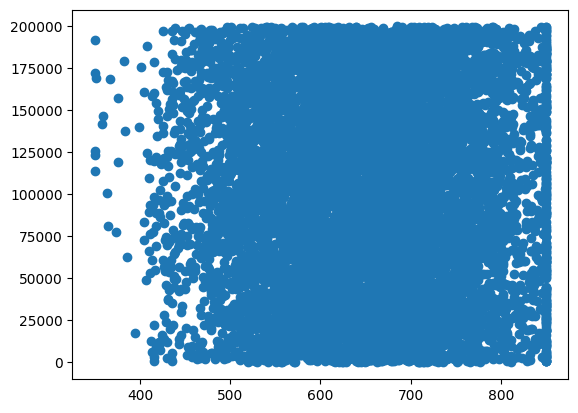

In [108]:
plt.scatter(df['CreditScore'], df['EstimatedSalary'])

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

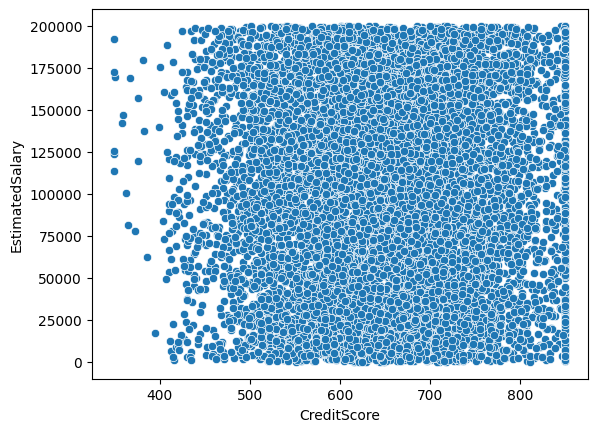

In [109]:
sns.scatterplot(data=df, x='CreditScore', y='EstimatedSalary')

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

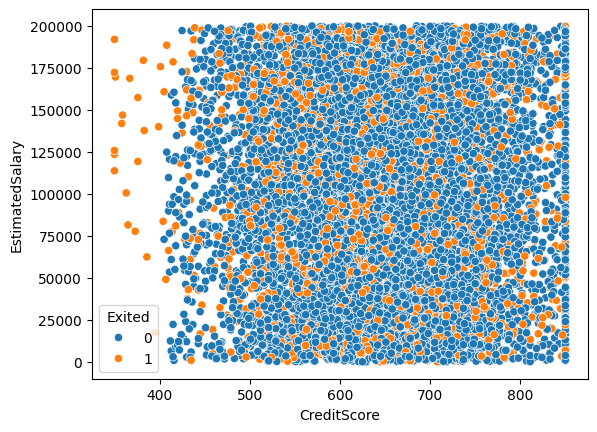

In [110]:
sns.scatterplot(data=df, x='CreditScore', y='EstimatedSalary',hue='Exited')

<Axes: xlabel='NumOfProducts', ylabel='Balance'>

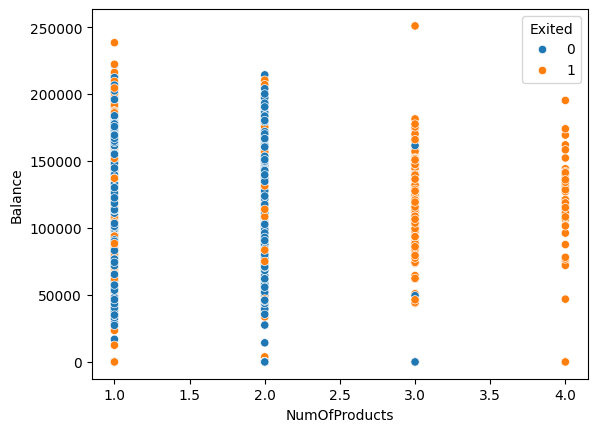

In [111]:
sns.scatterplot(data=df, x='NumOfProducts', y='Balance',hue='Exited')

<Axes: xlabel='NumOfProducts', ylabel='Balance'>

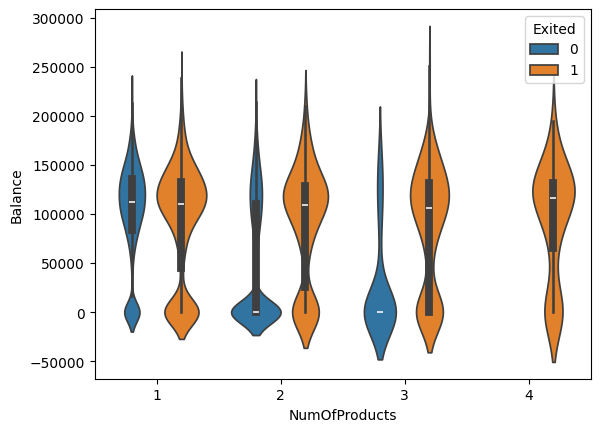

In [112]:
sns.violinplot(data=df, x='NumOfProducts', y='Balance',hue='Exited')

<Axes: xlabel='NumOfProducts', ylabel='Balance'>

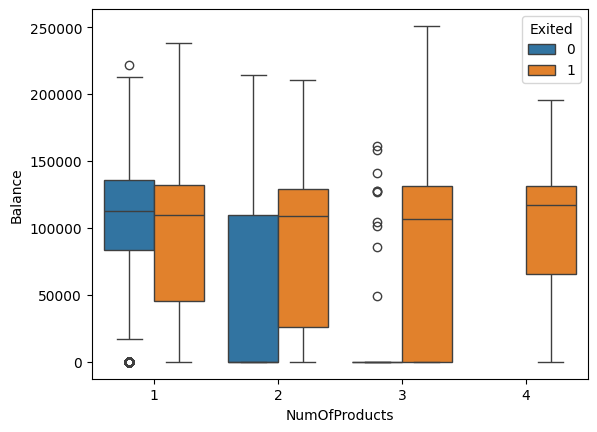

In [113]:
sns.boxplot(data=df, x='NumOfProducts', y='Balance',hue='Exited')

## Многомерный анализ признаков

In [114]:
# сводная таблица - средний баланс в разрезе стран и кол-ва продуктов
result = pd.pivot_table(data=df, index='Geography', columns='NumOfProducts', values='Balance')
result

NumOfProducts,1,2,3,4
Geography,,,,
France,90977.877896,31828.097047,50071.822500,71362.731379
Germany,119868.328139,119341.245038,121572.672396,121442.305417
Spain,90595.373063,32690.852688,48385.897121,91407.651429


<Axes: xlabel='NumOfProducts', ylabel='Geography'>

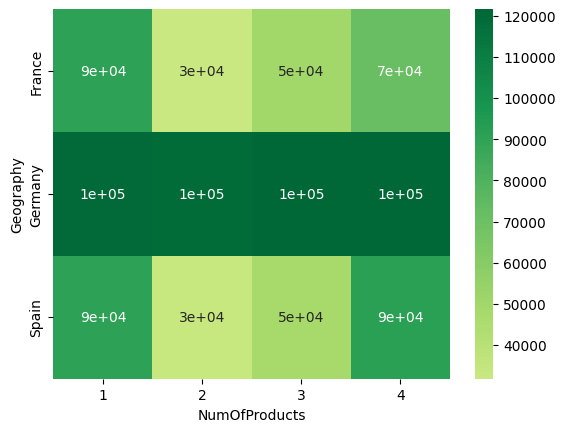

In [115]:
# тепловая карта баланса в разрезе и кол-ва продуктов
sns.heatmap(result, annot=True, cmap='RdYlGn', center=0.117, fmt='.1g')


## Предварительная обработка данных

Какие действия выполняются в процессе предварительной подготовки?
 - преобразование типов данных (в т.ч. преобразование категориальных признаков в набор фиктивных бинарных признаков)
 - удаление выбросов
 - заполнение пропусков
 - нормализация (масштабирование) числовых признаков
 - формирование дата-сета для обучения моделей (исключение признаков, объединение с фиктивными признаками и др.)

### Преобразование типов

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Geography_num    10000 non-null  int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 1.1+ MB


In [117]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,1


### Выявление выбросов

In [118]:
numeric_columns = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age']

In [119]:
df[numeric_columns].describe().round(2)

,CreditScore,Balance,EstimatedSalary,Age
count,10000.00,10000.00,10000.00,10000.00
mean,650.53,76485.89,100090.24,38.92
std,96.65,62397.41,57510.49,10.49
min,350.00,0.00,11.58,18.00
25%,584.00,0.00,51002.11,32.00
50%,652.00,97198.54,100193.92,37.00
75%,718.00,127644.24,149388.25,44.00
max,850.00,250898.09,199992.48,92.00


### Преобразование небинарных категориальных признаков в набор фиктивных бинарных

In [123]:
geography_cols = pd.get_dummies(df['Geography'],dtype=int)
geography_cols.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


### Формирование дата-сета для обучения модели

In [124]:
# список имен признаков, которые будут использованться для построения модели
features_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [126]:
# Объединение изначальных признаков и фиктивных бинарных признаков - формирование матрицы Объекты-признаки
X = pd.concat([df[features_names],geography_cols],axis = 1)
X.shape

(10000, 12)

In [127]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [128]:
# выведение целевой переменной (таргета) в отдельный вектор
y = df['Exited']

# Первичное обучение модели и оценка качества прогнозирования

In [129]:
# Разделение набора данных на тестовую и обучающую выборку
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [130]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 12) (2000, 12) (8000,) (2000,)


In [131]:
# Нормализация обучающих данных
from sklearn.preprocessing import StandardScaler

In [139]:
%%time
# Обучение модели классификации на основе метода К ближайших соседей (KNN)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 46.9 ms
Wall time: 51 ms


KNeighborsClassifier()

In [140]:
%%time
# прогнозирование класса клиента для обучающей и тестовой выборки 
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print(y_train_predict.shape, type(y_train_predict), y_train_predict[:10])
print(y_test_predict.shape, type(y_test_predict), y_test_predict[:10])

(8000,) <class 'numpy.ndarray'> [0 1 0 0 0 0 0 0 0 0]
(2000,) <class 'numpy.ndarray'> [0 0 1 0 0 0 0 0 0 0]
CPU times: total: 750 ms
Wall time: 831 ms


In [141]:
# Вычисляем ошибки прогнозировакия как доля неверно классифицированых клиентов
err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)
print(err_train, err_test)

0.182625 0.239


In [142]:
# оценка точности 
from sklearn.metrics import accuracy_score

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.817375
test accuracy:  0.761
